# 1. Data Exploration

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Load dataset
df = pd.read_csv("bank-additional-full.csv", sep=",")

# Display first few rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [208]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [209]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [210]:
# Identify Feature Types

categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns

print("Categorical Features:\n", categorical_cols)
print("\nNumerical Features:\n", numerical_cols)


Categorical Features:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

Numerical Features:
 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


Target variable distribution

In [211]:
df['y'].value_counts()


,count
y,
no,36548
yes,4640


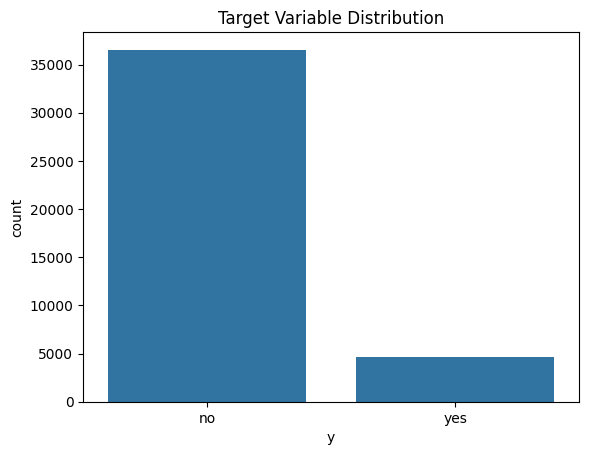

In [212]:
sns.countplot(x='y', data=df)
plt.title("Target Variable Distribution")
plt.show()


# 2 Data Preprocessing

#### 2.1 Handling Unknown Values

In [213]:
# Check unknown values
for col in categorical_cols:
    print(col, df[col].value_counts().get('unknown', 0))


job 330
marital 80
education 1731
default 8597
housing 990
loan 990
contact 0
month 0
day_of_week 0
poutcome 0
y 0


In [214]:
cols_replace_mode = ['job','marital','education']

for col in cols_replace_mode:
    df[col] = df[col].replace('unknown', df[col].mode()[0])


#### 2.2 Encode Target Variable

In [215]:
df['y'] = df['y'].map({'yes':1, 'no':0})


#### 2.3 Feature Encoding

In [216]:
binary_cols = ['housing','loan','default']

for col in binary_cols:
    df[col] = df[col].map({'yes':1, 'no':0, 'unknown':2})

# Replace unknown with mode
df['default'] = df['default'].replace('unknown', df['default'].mode()[0])
df['housing'] = df['housing'].replace('unknown', df['housing'].mode()[0])
df['loan'] = df['loan'].replace('unknown', df['loan'].mode()[0])


In [217]:
education_order = {
    'illiterate':0,
    'basic.4y':1,
    'basic.6y':2,
    'basic.9y':3,
    'high.school':4,
    'professional.course':5,
    'university.degree':6
}

df['education'] = df['education'].map(education_order)


In [218]:
df = pd.get_dummies(df, columns=['job','marital','contact','poutcome','month','day_of_week'], drop_first=True)


#### 2.4 Feature Scaling

In [219]:
X = df.drop('y', axis=1)
y = df['y']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [220]:
X

,age,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,1,0,0,0,261,1,999,0,1.1,...,False,False,True,False,False,False,True,False,False,False
1,57,4,2,0,0,149,1,999,0,1.1,...,False,False,True,False,False,False,True,False,False,False
2,37,4,0,1,0,226,1,999,0,1.1,...,False,False,True,False,False,False,True,False,False,False
3,40,2,0,0,0,151,1,999,0,1.1,...,False,False,True,False,False,False,True,False,False,False
4,56,4,0,0,1,307,1,999,0,1.1,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,1,0,334,1,999,0,-1.1,...,False,False,False,True,False,False,False,False,False,False
41184,46,5,0,0,0,383,1,999,0,-1.1,...,False,False,False,True,False,False,False,False,False,False
41185,56,6,0,1,0,189,2,999,0,-1.1,...,False,False,False,True,False,False,False,False,False,False
41186,44,5,0,0,0,442,1,999,0,-1.1,...,False,False,False,True,False,False,False,False,False,False


In [221]:
X.isna().sum()


,0
age,0
education,0
default,0
housing,0
loan,0
duration,0
campaign,0
pdays,0
previous,0
emp.var.rate,0


# 3. Train-Test Split

In [222]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# 4. Classification Models

#### 4.1 Logistic Regression

In [223]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


#### 4.2 KNN

In [224]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


4.3 SVM

In [225]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


4.4 Decision Tree

In [226]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


## 5. Ensemble Models

#### 5.1 Random Forest

In [227]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


#### 5.2 Bagging

In [228]:
bag = BaggingClassifier(random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)


#### 5.3 Gradient Boosting

In [229]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


# 6. Model Evaluation

In [230]:
#Create Evaluation Function
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))


Evaluate All Models

In [231]:
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Bagging", y_test, y_pred_bag)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)



Logistic Regression
Accuracy: 0.9162418062636563
Precision: 0.7102473498233216
Recall: 0.4331896551724138
F1 Score: 0.5381526104417671

KNN
Accuracy: 0.9024034959941734
Precision: 0.6123188405797102
Recall: 0.3642241379310345
F1 Score: 0.45675675675675675

SVM
Accuracy: 0.9135712551590192
Precision: 0.7134387351778656
Recall: 0.3890086206896552
F1 Score: 0.5034867503486751

Decision Tree
Accuracy: 0.8930565671279437
Precision: 0.5245046923879041
Recall: 0.5420258620689655
F1 Score: 0.5331213566507684

Random Forest
Accuracy: 0.9155134741442098
Precision: 0.6726190476190477
Recall: 0.4870689655172414
F1 Score: 0.565

Bagging
Accuracy: 0.9093226511289147
Precision: 0.624484181568088
Recall: 0.4892241379310345
F1 Score: 0.5486404833836858

Gradient Boosting
Accuracy: 0.9213401310997815
Precision: 0.6917808219178082
Recall: 0.5441810344827587
F1 Score: 0.609167671893848


#### Feature Importance (Using Random Forest)

In [232]:
importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df.head(10)


,Feature,Importance
5,duration,0.302692
12,euribor3m,0.107390
0,age,0.089371
13,nr.employed,0.049919
6,campaign,0.043448
1,education,0.038561
7,pdays,0.033274
11,cons.conf.idx,0.025853
28,poutcome_success,0.024419
10,cons.price.idx,0.023303


In [233]:
'''
Gradient Boosting Classifier is selected as the best model because:

It achieved the highest Accuracy (92.13%)

It achieved the highest Recall (54.41%)

It achieved the highest F1-score (0.609)

Ensemble learning models,  Gradient Boosting, provide best predictive performance compared to other classification models.
'''

'\nGradient Boosting Classifier is selected as the best model because:\n\nIt achieved the highest Accuracy (92.13%)\n\nIt achieved the highest Recall (54.41%)\n\nIt achieved the highest F1-score (0.609)\n\nEnsemble learning models,  Gradient Boosting, provide best predictive performance compared to other classification models.\n'